In [1]:
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.autowrap import ufuncify

# Constants

k = sp.sympify('1.4')    # [-]      # Gas capacity ratio
R = sp.sympify('287.05') # [J/kg K] # Universal Gas Constant
Cp = R*k/(k-1)           # [J/kg K] # Const pressure Heat Capacity
Cv = R/(k-1)             # [J/kg K] # Const pressure Heat Capacity

# Sympy

# Mach Number
M = sp.Symbol('M', positive=True)

# Pressure relation
p = sp.Symbol('p', positive=True)
po = sp.Symbol('p_0', positive=True)

# Temperature relation
T = sp.Symbol('T', positive=True)
To = sp.Symbol('T_0', positive=True)

# Density relation
rho = sp.Symbol('\rho', positive=True)
rhoo = sp.Symbol('\rho_0', positive=True)

# Area relation
A = sp.Symbol('A', positive=True)
A_star = sp.Symbol('A_*', positive=True)

## Area relation
$$
\frac{A}{A^*} = {\left(\frac{\gamma+1}{2}\right)}^{-\frac{\gamma+1}{2\left(\gamma-1\right)}}
\frac{{\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{\gamma+1}{2(\gamma-1)}}}{M}
$$

In [2]:
term1 = ( (k+1)/2           )**( -(k+1)/(k-1)/2)
term2 = ( (1 + M*M*(k-1)/2) )**(  (k+1)/(k-1)/2)
isentropic_area_relation = sp.Eq(
    term1*term2/M,
    A/A_star)
cd_A_A_star = sp.lambdify(M,
                           sp.solve(isentropic_area_relation,
                                    A/A_star)[0],
                           modules=['numpy']) 

## Density relation
$$
\frac{\rho}{\rho_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{-1}{\gamma-1}}
$$

In [3]:
isentropic_density_relation = sp.Eq(
    (1 + M*M*(k-1)/2)**(-1/(k-1)),
    rho/rhoo)
cd_rho_rhoo = sp.lambdify(M,
                           sp.solve(isentropic_density_relation,
                                    rho/rhoo)[0],
                           modules=['numpy'])   

## Temperature relation
$$
\frac{T}{T_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{-1}
$$

In [4]:
isentropic_temperature_relation = sp.Eq(
    (1 + M*M*(k-1)/2)**(-1),
    T/To)
cd_T_To = sp.lambdify(M,
                       sp.solve(isentropic_temperature_relation,
                                T/To)[0],
                       modules=['numpy'])  

## Pressure relation
$$
\frac{p}{p_o} = {\left[1 + \frac{\gamma-1}{2}M^2 \right]}^{\frac{-\gamma}{\gamma-1}}
$$

In [5]:
isentropic_pressure_relation = sp.Eq(
    (1 + M*M*(k-1)/2)**(-k/(k-1)), 
    p/po)
cd_p_po = sp.lambdify(M,
                       sp.solve(isentropic_pressure_relation,
                                p/po)[0],
                       modules=['numpy'])  

# Interactive Display

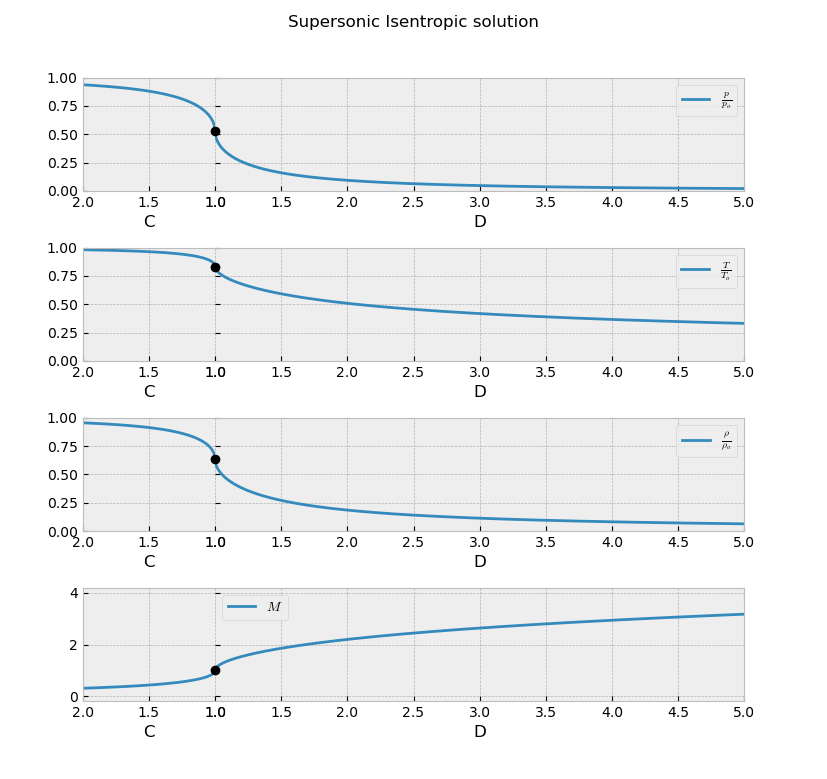

In [6]:
# Plot Relationship between To2/To1 and M1
with plt.style.context('bmh'):
    f, axs = plt.subplots(nrows=4, # Four quantities/ratios
                          ncols=2, # Need two plots per row that are "merged"
                          figsize=(8.27, 11.69*2/3), # Gotta have a good ratio for each subplot
                          dpi=100,
                          sharex=False, # Each subplot has ticks on the x axis
                          sharey='row',  # Each row of subplots have y axis on the extreme left
                          gridspec_kw={'width_ratios': [1, 4]})
    
    M1_vals = np.linspace(0.01, 1, 1000)
    M2_vals = np.linspace(1, 4, 1000)    
  
    axs[0][0].plot(cd_A_A_star(M1_vals), cd_p_po(M1_vals), 
              label=r'$\frac{p}{p_o}$')
    axs[0][1].plot(cd_A_A_star(M2_vals), cd_p_po(M2_vals), 
              label=r'$\frac{p}{p_o}$')
    axs[0][0].plot(cd_A_A_star(1), cd_p_po(1), 'ko')
    axs[0][1].plot(cd_A_A_star(1), cd_p_po(1), 'ko')      

    
    axs[1][0].plot(cd_A_A_star(M1_vals), cd_T_To(M1_vals), 
              label=r'$\frac{T}{T_o}$')        
    axs[1][1].plot(cd_A_A_star(M2_vals), cd_T_To(M2_vals), 
              label=r'$\frac{T}{T_o}$')    
    axs[1][0].plot(cd_A_A_star(1), cd_T_To(1), 'ko')
    axs[1][1].plot(cd_A_A_star(1), cd_T_To(1), 'ko')      

    
    axs[2][0].plot(cd_A_A_star(M1_vals), cd_rho_rhoo(M1_vals), 
              label=r'$\frac{\rho}{\rho_{o}}$')        
    axs[2][1].plot(cd_A_A_star(M2_vals), cd_rho_rhoo(M2_vals), 
              label=r'$\frac{\rho}{\rho_{o}}$')    
    axs[2][0].plot(cd_A_A_star(1), cd_rho_rhoo(1), 'ko')
    axs[2][1].plot(cd_A_A_star(1), cd_rho_rhoo(1), 'ko')      

    
    axs[3][0].plot(cd_A_A_star(M1_vals), M1_vals, 
              label=r'$M$')        
    axs[3][1].plot(cd_A_A_star(M2_vals), M2_vals, 
              label=r'$M$')        
    axs[3][0].plot(cd_A_A_star(1), 1, 'ko')
    axs[3][1].plot(cd_A_A_star(1), 1, 'ko')      
    
    
    
    # the converging section "converges" from left to right, ie has smaller area ratio till it hits one.
    # Would like to show this in the chart
    [ axs[i-1][0].invert_xaxis() for i in [1,2,3,4] ]      

    # Set the top of the chart to have proper titles for which half of the condi nozzle they are
    [ axs[i-1][0].set(xlabel='C') for i in [1,2,3,4] ]  
    [ axs[i-1][1].set(xlabel='D') for i in [1,2,3,4] ]       

    # Most quantities have a ratio that decreases. Putting the legend on the right handside.   
    [ axs[i-1][1].legend() for i in [1,2,3,4] ]  
    
    # display the graph with appropriate limits
    # You want the right graph to start at 1 while the left graph ends at 1
    # The other limit doesn't matter but I like keeping them the same so that the lower axis is uniform
    [ axs[i-1][0].set_xlim(left=2, right=1) for i in [1,2,3,4] ]    
    [ axs[i-1][1].set_xlim(left=1, right=5) for i in [1,2,3,4] ]
    [ axs[i-1][0].set_ylim(bottom=0, top=1) for i in [1,2,3] ]
    [ axs[i-1][1].set_ylim(bottom=0, top=1) for i in [1,2,3] ]

    # Turn off the graph boundary on appropriate edges 
    # The right graph shouldn't have a bold boundary line on the left.
    # The left graph shouldn't have a bold boundary line on the right.
    [ axs[i-1][0].spines['right'].set_visible(False) for i in [1,2,3,4] ]    
    [ axs[i-1][1].spines['left'].set_visible(False) for i in [1,2,3,4] ]        
    
    #plt.tight_layout()    
    plt.subplots_adjust(left=0.1, right=0.9, 
                        bottom=0.1, top=0.9, 
                        wspace=0, hspace=0.5)
    plt.suptitle("Supersonic Isentropic solution", fontsize=12)
    plt.show()